# TOXIC COMMENT CLASSIFICATION
From this model we can be predict whether the comment is 'malignant','highly_malignant','rude','threat','abuse','loathe'.

# **Implemented in google colab as file is too big.This is a classification problem and I have choosen
# 1.Accuracy,
# 2.Log-loss,
# 3.Hammingloss as my evaluation metric**

# 1. Import necessary libraries

# 2.Read the train.csv and test.csv file(parallely preprocessing is done for both train and test datasets).

# 3.Shuffling of indices, to avoid using train_test_split later
df = df.reindex(np.random.permutation(df.index))

# 4. Separate the comment feature(X) data and outcome labels(y) 
#label = df[['malignant','highly_malignant','rude','threat','abuse','loathe']]

# Visualizations

# Data Preprocessing
### Removing excessive length for training data only.(kept as 400 keeping the computation power in consideration.)

# 5. Initializing the Vocabulary size(5000)

# 6. Making of corpus by GENERIC NLP FILTER CODE

a. Convert all cases to lower
b. Remove punctuations
c. Remove Stopwords
d. Stemming and Lemmatising

# 7.Applying embedding technique.(Count Vectoriser is giving memory error)

# 8. OneHot Encoding(or dummies)

# Initializing maximumu length of embedding_vector_features=30.

# 9. Applying embedding technique.(Count Vectoriser is giving memory error)
 embedded docs--numerical(vector) format can be input to any ML or DL model)

# 10. Train_test_split training data(embedded_docs)in a different way as our target feature('labels') contains 6 classes.

#Our data is now ready for model building process input numerical format.

# Define all the 3 evaluation metrics(accuracy,logloss,hammingloss)

# PART-1-DL-NN-Model Building(score=87.97%) after GridsearchCV(88.007%)

.X(embedded_docs) y( df['label] )
. Model training(20 epochs)
. Predicting
. Check the accuracy. (accuracy=87.96% )

# GridsearchCV.(accuracy=88.26% )

# PART-2--Multiple classifier ML models(4types)
# X(embedded_docs) y( df['label] )

# A. BinaryRelevance

from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

# B.ClassifierChain

from skmultilearn.problem_transform import ClassifierChain

# C. LabelPowerset

from skmultilearn.problem_transform import LabelPowerset

# D.MLKNN

from skmultilearn.adapt import MLkNN

#In all the Models above
11. Predicting 
12. Check the accuracy,log-loss,hamming score.

# Visualzitaion of Log-Loss and hamming loss of all models.

# Comparing All models and Concluding!

On basis of **hamming loss:-------------------
The best model would be **SVM classifier**. It has lowest hamming-loss of 4.384 % only.

On basis of **Log-Loss:--------------------
The best model will be the **Neural Network Model**. It has lowest Log-loss of 0.375 % only.



# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

from sklearn.naive_bayes import MultinomialNB

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from skmultilearn.problem_transform import ClassifierChain

from skmultilearn.problem_transform import LabelPowerset

from skmultilearn.adapt import MLkNN

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools

In [ ]:
#From colab mounting drive to import datasets via path link of file(right-click on file) on google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#While converting text to vectors using count vectorizer

Local-->MemoryError: Unable to allocate 62.4 GiB for an array with shape (115893, 72292) and data type int64.
colab-->Your session crashed after using all available RAM. View runtime logs

So i have used embedding technique to converting text to vectors

Simple NN is applied here,LSTM & Bidirectional LSTM are applied gives error as there are multiple outputs.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Read the csv file into dataframe df
df = pd.read_csv("/content/drive/MyDrive/train_malignant.csv")#Importing the training data

test=pd.read_csv("/content/drive/MyDrive/test_malignant.csv")#Importing the test data
print(df.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [ ]:
test.head()#test data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
df.head()#training data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
#List the fields in our dataframe
print(df.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


Hence we have a sufficiently large training data consisting of '153164' samples. Each sample contains 8 fields. <br/>
**It was observed that running train_test_split on the heavy preprocessed dataframe sometimes resulted in system going out of memory. Hence to avoid such cases, one extra line of code was added. The df.reindex code will shuffle the indices initially, so that later splitting dataset into training and testing will give fairer results.**

In [ ]:
# below line causes shuffling of indices, to avoid using train_test_split later
df = df.reindex(np.random.permutation(df.index))

# Separate the comment feature(X) data and outcome labels(y)

# Making the independent feature

In [ ]:
comment = df['comment_text']
print(comment.head())
comment = comment.values

143358    It was actually great! I had told him that som...
63193     Dawood Ibrahim \nThe debate over whether to ha...
31752        My abuelo told me he was distant, but related.
110859    "\n\n""White supremacism"" as a Jewish and Mar...
93643     " He also wasn't convicted of treason. What ha...
Name: comment_text, dtype: object


In [ ]:
type(comment)

numpy.ndarray

# Making the target feature

In [ ]:
label = df[['malignant','highly_malignant','rude','threat','abuse','loathe']]
print(label.head())
label = label.values

        malignant  highly_malignant  rude  threat  abuse  loathe
143358          0                 0     0       0      0       0
63193           0                 0     0       0      0       0
31752           0                 0     0       0      0       0
110859          0                 0     0       0      0       0
93643           0                 0     0       0      0       0


In [ ]:
type(label)

numpy.ndarray

### Let us find out the frequency of occurence of multilabelled data 
- ct1 counts samples having atleast one label
- ct2 counts samples having 2 or more than 2 labels

In [ ]:
ct0,ct1,ct2 = 0,0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label[i])#Gives the no. of non-zero's i.e 1's in respective row.
    if ct==0:
        ct0=  ct0+1.
    if ct==1 :         #if ct gives a value then ct1=ct1+1(incremented)
        ct1 = ct1+1
    if ct>1 :                     #2 or >2
        ct2 = ct2+1
print(ct0)
print(ct1)
print(ct2)

143346.0
6360
9865


# No.'s of Non malignant comments

In [ ]:
df.shape[0]-ct1-ct2  #No of comments with no 1's in thr 

143346

## Data Visualisations
### Let us analyse the no. of comments having lengths varying from 0 to 1200

average length of comment: 394.139


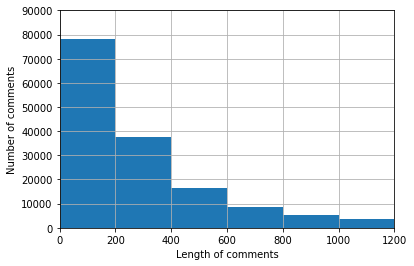

In [ ]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

### Number of comments classified as malignant,highly_malignant,rude,....etc depending on their lengths for train data.



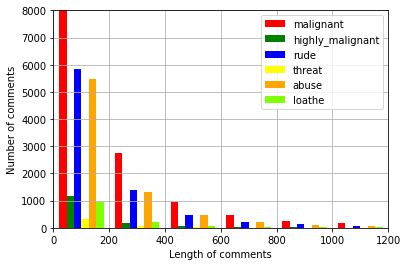

In [ ]:
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['malignant','highly_malignant','rude','threat','abuse','loathe']
color = ['red','green','blue','yellow','orange','chartreuse']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

# Inference-
# data with low sentence lengths( <200) are malignant,rude,abuse.

### Removing excessive length for training data here.
Some very large length comments can be seen, in our dataset. These pose serious problems like adding excessively more words to the training dataset, causing training time to increase and accuracy to decrease!<br/>
Hence, a threshold of 400 characters will be created and only comments which have length smaller than 400 will be used further.

In [ ]:
comments = []
labels = []

for ix in range(comment.shape[0]):
    if len(comment[ix])<=400:
        comments.append(comment[ix])
        labels.append(label[ix])

In [ ]:
print(len(comments),len(labels))

115893 115893


Hence, after removing comments longer than 400 characters, we are still left with more than 115893 comments, which seems enough for training purposes.

In [ ]:
comments

['It was actually great! I had told him that someone would check behind him and help with minor corrections or better wording so he should be bold and write. He did not preview change before he posted and I was setting up for another class and did not see it. Proved the system works! Thanks!',
 'Dawood Ibrahim \nThe debate over whether to have the NPOV tag has ended. I made some minor changes and all parties agreed that it had been neutralized. Thanks for your input nonetheless.  00:03, August 1, 2005 (UTC)',
 'My abuelo told me he was distant, but related.',
 "Thankyou, could you please email the correspondence to me, Special:Emailuser/Comaze. Is there any way to confirm or deny Bateson's involvement in Bandler's MA? Bateson wrote the foreword for Magic I, signed, 'Gregory Bateson, Kresge College, UCSC'.",
 'Facts matter a great deal to encyclopedias and scholars meticulous about dates, quotes and other minor historical details.  There are even ways to check facts, unlike opinions, as

In [ ]:
labels

[array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

## For test data

In [ ]:
comments_test = test[['comment_text']]

In [ ]:
type(comments_test)

pandas.core.frame.DataFrame

In [ ]:
comments_test

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
...,...
153159,". \n i totally agree, this stuff is nothing bu..."
153160,== Throw from out field to home plate. == \n\n...
153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,""" \n\n == """"One of the founding nations of the..."


In [ ]:
comments_test['comment_text'][0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [ ]:
testcomments= []


for ix in range(comments_test.shape[0]):
    if len(comments_test['comment_text'][ix])<=400:
        testcomments.append(comments_test['comment_text'][ix])
        
        

In [ ]:
testcomments

["Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,",
 '== From RfC == \n\n The title is fine as it is, IMO.',
 '" \n\n == Sources == \n\n * Zawe Ashton on Lapland —  /  "',
 ":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message.",
 "I don't anonymously edit articles at all.",
 'Thank you for understanding. I think very highly of you and would not revert without discussion.',
 'Please do not add nonsense to Wikipedia. Such edits are considered vandalism and quickly undone. If you would like to experiment, please use the sand

In [ ]:
len(testcomments)

115769

Hence, after removing comments longer than 400 characters, we are still left with more than "11579" comments, which seems enough for testing purposes.

# visualization(test data)

average length of comment: 364.875


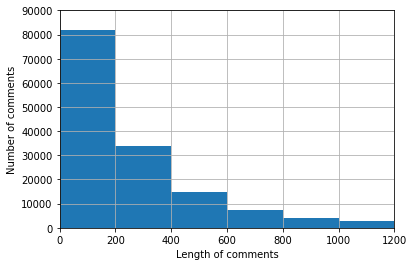

In [ ]:
x = [len(comments_test['comment_text'][i]) for i in range(comments_test.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

# Preprocessing 
Preprocessing involved the following steps, but these will be performed in a slightly different manner:
- Removing Punctuations and other special characters
- Splitting the comments into individual words
- Removing Stop Words
- Stemming and Lemmatising
- Applying embedding technique.(Count Vectoriser is giving memory error)
- Splitting dataset into Training and Testing

## NLP Generic Code


In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
messages=comments.copy()

In [ ]:
messages

['It was actually great! I had told him that someone would check behind him and help with minor corrections or better wording so he should be bold and write. He did not preview change before he posted and I was setting up for another class and did not see it. Proved the system works! Thanks!',
 'Dawood Ibrahim \nThe debate over whether to have the NPOV tag has ended. I made some minor changes and all parties agreed that it had been neutralized. Thanks for your input nonetheless.  00:03, August 1, 2005 (UTC)',
 'My abuelo told me he was distant, but related.',
 "Thankyou, could you please email the correspondence to me, Special:Emailuser/Comaze. Is there any way to confirm or deny Bateson's involvement in Bandler's MA? Bateson wrote the foreword for Magic I, signed, 'Gregory Bateson, Kresge College, UCSC'.",
 'Facts matter a great deal to encyclopedias and scholars meticulous about dates, quotes and other minor historical details.  There are even ways to check facts, unlike opinions, as

In [ ]:
messages=pd.DataFrame(messages)

In [ ]:
messages[0][0]

'It was actually great! I had told him that someone would check behind him and help with minor corrections or better wording so he should be bold and write. He did not preview change before he posted and I was setting up for another class and did not see it. Proved the system works! Thanks!'

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
comments_test.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages[0][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
110893
110894
110895
110896
110897
110898
110899
110900
110901
110902
110903
110904
110905
110906
110907
110908
110909
110910
110911
110912
110913
110914
110915
110916
110917
110918
110919
110920
110921
110922
110923
110924
110925
110926
110927
110928
110929
110930
110931
110932
110933
110934
110935
110936
110937
110938
110939
110940
110941
110942
110943
110944
110945
110946
110947
110948
110949
110950
110951
110952
110953
110954
110955
110956
110957
110958
110959
110960
110961
110962
110963
110964
110965
110966
110967
110968
110969
110970
110971
110972
110973
110974
110975
110976
110977
110978
110979
110980
110981
110982
110983
110984
110985
110986
110987
110988
110989
110990
110991
110992
110993
110994
110995
110996
110997
110998
110999
111000
111001
111002
111003
111004
111005
111006
111007
111008
111009
111010
111011
111012
111013
111014
111015
111016
111017
111018
111019
111020
111021
111022
111023
111024
111025
111026
111027
1110

In [40]:
corpus

['actual great told someon would check behind help minor correct better word bold write preview chang post set anoth class see prove system work thank',
 'dawood ibrahim debat whether npov tag end made minor chang parti agre neutral thank input nonetheless august utc',
 'abuelo told distant relat',
 'thankyou could pleas email correspond special emailus comaz way confirm deni bateson involv bandler bateson wrote foreword magic sign gregori bateson kresg colleg ucsc',
 'fact matter great deal encyclopedia scholar meticul date quot minor histor detail even way check fact unlik opinion assumpt interpret dec utc',
 'articl need rewrit clean still lot duplic structur confus encourag someon time abil bold reorgan rewrit deepli',
 'littl bit longer song hi seen remov articl littl bit longer song inform revert back redirect think sinc articl origin delet lack inform releas keep inform revert back edit thank callieg',
 'faget ill wish fat ass cock sucker',
 'lol thank anyway worth ask good tran

##For test data preprocessing

In [41]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus_test = []
for i in range(0, len(comments_test)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', comments_test['comment_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_test.append(review)

Streaming output truncated to the last 5000 lines.
148164
148165
148166
148167
148168
148169
148170
148171
148172
148173
148174
148175
148176
148177
148178
148179
148180
148181
148182
148183
148184
148185
148186
148187
148188
148189
148190
148191
148192
148193
148194
148195
148196
148197
148198
148199
148200
148201
148202
148203
148204
148205
148206
148207
148208
148209
148210
148211
148212
148213
148214
148215
148216
148217
148218
148219
148220
148221
148222
148223
148224
148225
148226
148227
148228
148229
148230
148231
148232
148233
148234
148235
148236
148237
148238
148239
148240
148241
148242
148243
148244
148245
148246
148247
148248
148249
148250
148251
148252
148253
148254
148255
148256
148257
148258
148259
148260
148261
148262
148263
148264
148265
148266
148267
148268
148269
148270
148271
148272
148273
148274
148275
148276
148277
148278
148279
148280
148281
148282
148283
148284
148285
148286
148287
148288
148289
148290
148291
148292
148293
148294
148295
148296
148297
148298
1482

In [42]:
corpus_test

['yo bitch ja rule succes ever what hate sad mofucka bitch slap ur pethed white face get kiss ass guy sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother fuckin white boy get thing right next time',
 'rfc titl fine imo',
 'sourc zaw ashton lapland',
 'look back sourc inform updat correct form guess sourc updat shall updat inform thank messag',
 'anonym edit articl',
 'thank understand think highli would revert without discuss',
 'pleas add nonsens wikipedia edit consid vandal quickli undon would like experi pleas use sandbox instead thank',
 'dear god site horribl',
 'fool believ number correct number lie ponder number care error persist long time continu reproduc latest reproduct know encyclop dia britannica almanac wich state magnittud fair enough victim today lot guess peopl come number impress enough know know shameless lucki number throw air gc',
 'doubl redirect fix doubl redirect blank outer one need edit point final target unless think inapprop

In [43]:
len(corpus_test)

153164

#One hot encoding

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

# For train data(corpus)

In [45]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[2097,
  1933,
  4766,
  3116,
  2891,
  4575,
  3302,
  4447,
  1833,
  2352,
  785,
  1796,
  4562,
  4094,
  87,
  4726,
  3453,
  4191,
  2293,
  4071,
  234,
  4700,
  2711,
  2911,
  4199],
 [791,
  4851,
  1807,
  2391,
  4053,
  3249,
  4411,
  4831,
  1833,
  4726,
  2134,
  1848,
  2267,
  4199,
  834,
  800,
  4697,
  4064],
 [3959, 4766, 2883, 2989],
 [1111,
  1720,
  1588,
  2787,
  1086,
  2153,
  3946,
  79,
  4330,
  2108,
  3072,
  442,
  1828,
  574,
  442,
  2038,
  1717,
  4924,
  3516,
  2772,
  442,
  3668,
  3733,
  2963],
 [2707,
  513,
  1933,
  2185,
  2303,
  595,
  4543,
  2547,
  3388,
  1833,
  4498,
  307,
  682,
  4330,
  4575,
  2707,
  2201,
  617,
  3579,
  1530,
  4759,
  4064],
 [4899,
  2228,
  984,
  2192,
  2249,
  3917,
  3949,
  3864,
  4376,
  1744,
  3116,
  2244,
  3747,
  4562,
  414,
  984,
  1223],
 [621,
  3958,
  1925,
  1570,
  4748,
  891,
  2395,
  4899,
  621,
  3958,
  1925,
  1570,
  4503,
  322,
  4939,
  2077,
  26,
  321,
  48

# For test data(corpus_test)

In [46]:
onehot_test=[one_hot(words,voc_size)for words in corpus_test] 
onehot_test

[[4422,
  3988,
  3745,
  1558,
  4639,
  98,
  3866,
  2387,
  4798,
  2397,
  3988,
  2803,
  3394,
  1193,
  2037,
  2045,
  126,
  4237,
  437,
  4430,
  183,
  3745,
  1558,
  2210,
  847,
  1117,
  2144,
  4083,
  1743,
  605,
  3987,
  1769,
  2996,
  987,
  100,
  1125,
  4112,
  2037,
  4231,
  126,
  1203,
  1284,
  4136,
  2244],
 [960, 591, 4373, 1719],
 [1022, 2802, 720, 3853],
 [4178,
  4939,
  1022,
  4503,
  3089,
  2352,
  4891,
  2128,
  1022,
  3089,
  4857,
  3089,
  4503,
  4199,
  3962],
 [3753, 1574, 4899],
 [4199, 4717, 26, 1913, 2891, 322, 647, 3246],
 [1588,
  2793,
  4151,
  1557,
  1574,
  291,
  3813,
  4161,
  3856,
  2891,
  987,
  3574,
  1588,
  1127,
  759,
  2574,
  4199],
 [1018, 2077, 1447, 4520],
 [4508,
  242,
  1229,
  2352,
  1229,
  163,
  2250,
  1229,
  3529,
  2195,
  2373,
  2798,
  2244,
  2629,
  3499,
  3300,
  152,
  4851,
  1454,
  48,
  4789,
  1318,
  290,
  2325,
  4779,
  695,
  3977,
  3173,
  3382,
  3917,
  2128,
  1287,
  2467,

# Embedding Representation

In [47]:
import pandas as pd

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [48]:
#Initializing length of embedding docs
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2711 2911 4199]
 [   0    0    0 ...  800 4697 4064]
 [   0    0    0 ... 4766 2883 2989]
 ...
 [   0    0    0 ...  598 1287 4594]
 [   0    0    0 ... 3636  387 3269]
 [   0    0    0 ... 3791  284 1233]]


In [49]:
embedded_docs[0]

array([   0,    0,    0,    0,    0, 2097, 1933, 4766, 3116, 2891, 4575,
       3302, 4447, 1833, 2352,  785, 1796, 4562, 4094,   87, 4726, 3453,
       4191, 2293, 4071,  234, 4700, 2711, 2911, 4199], dtype=int32)

In [50]:
len(embedded_docs)

115893

In [51]:
labels

[array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

In [52]:
print(embedded_docs.shape)

(115893, 30)


# For test data

In [54]:
sent_length=30
embedded_docs_test=pad_sequences(onehot_test,padding='pre',maxlen=sent_length)
print(embedded_docs_test)

[[2037 2045  126 ... 1284 4136 2244]
 [   0    0    0 ...  591 4373 1719]
 [   0    0    0 ... 2802  720 3853]
 ...
 [   0    0 2626 ... 2913 1132 3604]
 [4269 2338 4701 ...  682 3721 2571]
 [   0    0    0 ... 3977   99 4870]]


In [55]:
embedded_docs_test[0]

array([2037, 2045,  126, 4237,  437, 4430,  183, 3745, 1558, 2210,  847,
       1117, 2144, 4083, 1743,  605, 3987, 1769, 2996,  987,  100, 1125,
       4112, 2037, 4231,  126, 1203, 1284, 4136, 2244], dtype=int32)

In [56]:
len(embedded_docs_test)

153164

## Splitting dataset into training and testing
- Since the system was going out of memory using train_test_split, I had jumbled all the indexes in the beginning itself. 
- The shuffle function defined here performs the task of assigning first 2/3rd values to train and remaining 1/3rd values to the test set.

#Train_test_split training data(embedded_docs)in a different way as our target feature('labels') contains 6 columns

In [57]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(labels)

In [58]:
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(X_final, y_final,3)

print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(38631, 30)
(77262, 30)
(38631, 6)
(77262, 6)


In [59]:
len(embedded_docs),len(labels)

(115893, 115893)

# Implementation :
### Let us define all the evaluation metrics

In [60]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

# NN-Model Building

In [61]:
#define model architecture
model = Sequential()
        #i/p layer--4 neurons         #i/p layer= 30 features
model.add(Dense(4, activation='relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))        #0/p layer--6 neuron
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 124       
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________


In [62]:
#compile model with all parameters set
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
2415/2415 [==============================] - 8s 2ms/step - loss: 9.1419 - accuracy: 0.6559
Epoch 2/20
2415/2415 [==============================] - 5s 2ms/step - loss: 0.4244 - accuracy: 0.9947
Epoch 3/20
2415/2415 [==============================] - 5s 2ms/step - loss: 0.4094 - accuracy: 0.9949
Epoch 4/20
2415/2415 [==============================] - 5s 2ms/step - loss: 0.4101 - accuracy: 0.9943
Epoch 5/20
2415/2415 [==============================] - 5s 2ms/step - loss: 0.3874 - accuracy: 0.9944
Epoch 6/20
2415/2415 [==============================] - 5s 2ms/step - loss: 0.3849 - accuracy: 0.9944
Epoch 7/20
2415/2415 [==============================] - 5s 2ms/step - loss: 0.3845 - accuracy: 0.9940
Epoch 8/20
2415/2415 [==============================] - 5s 2ms/step - loss: 0.3796 - accuracy: 0.9946
Epoch 9/20
2415/2415 [==============================] - 5s 2ms/step - loss: 0.3770 - accuracy: 0.9944
Epoch 10/20
2415/2415 [==============================] - 5s 2ms/step - loss: 0.373

In [64]:
#predictions
predict = model.predict(X_test)

In [65]:
predict[0]

array([0.3276135 , 0.08799016, 0.22974993, 0.05174885, 0.22107227,
       0.08182523], dtype=float32)

Since the results returned by the model are in the form of probabilities, they have to be explicitly converted to either 0/1 using the round function. 

This is because the hamming_loss and accuracy_score cannot work on these values directly. 


However, log loss can compute loss directly without modifying the values.

In [66]:
#calculate score
loss = log_loss(Y_test,predict)
print("Log_loss : {}".format(loss))

predict = np.round(predict)

loss = hamming_loss(Y_test,predict)
print("Hamming_loss : {}".format(loss*100))
accuracy = accuracy_score(Y_test,predict)
print("Accuracy : {}".format(accuracy*100))

Log_loss : 0.3969782519871256
Hamming_loss : 4.363939150768381
Accuracy : 88.00704097745334


In [67]:
predict

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

#Predicting for test data

In [68]:
#predictions
predict_test = np.round(model.predict(embedded_docs_test))
predict_test

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [69]:
predict_test=pd.DataFrame(predict_test)
predict_test

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
153159,0.0,0.0,0.0,0.0,0.0,0.0
153160,0.0,0.0,0.0,0.0,0.0,0.0
153161,0.0,0.0,0.0,0.0,0.0,0.0
153162,0.0,0.0,0.0,0.0,0.0,0.0


## Let us try improving the NN model (GridSearchCV)-->88.007 to 88.26 %

# Both log loss and hamming loss have also reduced a very little.


In [84]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers



In [121]:
def create_model(nodes,layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 6, activation = 'softmax')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model)

In [115]:
#model = KerasClassifier(build_fn=create_model)

In [122]:
#define parameters for using in param grid
nodes = [10,16] # number of nodes in the hidden layer
layers = [(20,), (40, 20)]
epochs = [10,20]
batch_size = [16,32,64]
activations=['softmax']

In [123]:
param_grid = dict(nodes=nodes,layers=layers,batch_size = batch_size,epochs=epochs,activation=activations)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=1,refit=True,verbose=2)
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] activation=softmax, batch_size=16, epochs=10, layers=(20,), nodes=10 
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3864/3864 [==============================] - 8s 2ms/step - loss: 0.4449 - accuracy: 0.7589
Epoch 2/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.4017 - accuracy: 0.9952
Epoch 3/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3917 - accuracy: 0.9950
Epoch 4/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3851 - accuracy: 0.9949
Epoch 5/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3858 - accuracy: 0.9946
Epoch 6/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3828 - accuracy: 0.9947
Epoch 7/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3736 - accuracy: 0.9953
Epoch 8/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3780 - accuracy: 0.9946
Epoch 9/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3761 - accuracy: 0.9954
Epoch 10/10
966/966 [==============================] - 2s 2ms/step - loss: 0.3699 - accuracy:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


3864/3864 [==============================] - 9s 2ms/step - loss: 0.4353 - accuracy: 0.8144
Epoch 2/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.4151 - accuracy: 0.9940
Epoch 3/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3965 - accuracy: 0.9945
Epoch 4/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3866 - accuracy: 0.9945
Epoch 5/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3720 - accuracy: 0.9942
Epoch 6/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3805 - accuracy: 0.9948
Epoch 7/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3718 - accuracy: 0.9943
Epoch 8/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3777 - accuracy: 0.9942
Epoch 9/10
3864/3864 [==============================] - 8s 2ms/step - loss: 0.3727 - accuracy: 0.9941
Epoch 10/10
966/966 [==============================] - 2s 2ms/step - loss: 0.3646 - accuracy:

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 166.4min finished


4829/4829 [==============================] - 11s 2ms/step - loss: 0.4350 - accuracy: 0.3561
Epoch 2/10
4829/4829 [==============================] - 10s 2ms/step - loss: 0.4006 - accuracy: 0.9944
Epoch 3/10
4829/4829 [==============================] - 11s 2ms/step - loss: 0.3836 - accuracy: 0.9942
Epoch 4/10
4829/4829 [==============================] - 11s 2ms/step - loss: 0.3768 - accuracy: 0.9944
Epoch 5/10
4829/4829 [==============================] - 11s 2ms/step - loss: 0.3780 - accuracy: 0.9943
Epoch 6/10
4829/4829 [==============================] - 10s 2ms/step - loss: 0.3836 - accuracy: 0.9945
Epoch 7/10
4829/4829 [==============================] - 11s 2ms/step - loss: 0.3676 - accuracy: 0.9944
Epoch 8/10
4829/4829 [==============================] - 11s 2ms/step - loss: 0.3744 - accuracy: 0.9945
Epoch 9/10
4829/4829 [==============================] - 11s 2ms/step - loss: 0.3709 - accuracy: 0.9946
Epoch 10/10
4829/4829 [==============================] - 11s 2ms/step - loss: 0.3592

In [124]:
print(grid_result)

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9abc0d6850>,
             iid='deprecated', n_jobs=1,
             param_grid={'activation': ['softmax'], 'batch_size': [16, 32, 64],
                         'epochs': [10, 20], 'layers': [(20,), (40, 20)],
                         'nodes': [10, 16]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)


In [125]:
print('Best estimator : {}'.format (grid.best_estimator_))
print('Best score : {}'.format(grid.best_score_))
print('Best params : {}'.format(grid.best_params_))

Best estimator : <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9aa85b94d0>
Best score : 0.9945251226425171
Best params : {'activation': 'softmax', 'batch_size': 16, 'epochs': 10, 'layers': (20,), 'nodes': 10}


In [126]:
print(grid.cv_results_)

{'mean_fit_time': array([ 79.74962711,  80.4866251 ,  87.23973432,  87.80599613,
       166.80342712, 172.46087561, 188.99026508, 193.4190577 ,
        45.98970613,  46.68884363,  50.08828406,  50.67619996,
        94.49535599,  95.73885536, 104.04699578, 104.65807676,
        25.14825587,  25.26337724,  27.03068218,  27.27326975,
        50.94470892,  51.27455797,  54.97245388,  55.64066682]), 'std_fit_time': array([0.58472945, 0.369286  , 0.9147727 , 0.29152738, 1.28006279,
       1.1914393 , 1.43028491, 1.56289646, 0.17596047, 0.68003303,
       0.66013132, 0.37942862, 0.38631114, 0.45891295, 1.3577121 ,
       1.04888833, 0.26418455, 0.13532241, 0.05800725, 0.19918018,
       0.24502936, 0.3654394 , 0.19173083, 0.46259915]), 'mean_score_time': array([1.77050071, 1.79560375, 1.84377317, 1.87493806, 1.97905874,
       1.93853183, 1.988482  , 2.03982439, 1.06794696, 1.08438067,
       1.11732583, 1.15119495, 1.11258473, 1.14466982, 1.17507973,
       1.18189735, 0.65496974, 0.66446977

In [132]:
#predictions
predict = grid.predict_proba(X_test)
print(predict.shape)

(38631, 6)


# calculate score #Score has increased a little bit----------> 87.97 to 88.26

In [133]:

loss = log_loss(Y_test,predict)
print("Log_loss : {}".format(loss))
predict = np.round(predict)
loss = hamming_loss(Y_test,predict)
print("Hamming_loss : {}".format(loss*100))
accuracy = accuracy_score(Y_test,predict)
print("Accuracy : {}".format(accuracy*100))

Log_loss : 0.37443831494875873
Hamming_loss : 4.329855987850863
Accuracy : 88.26331184799773


# Conclusion

In [ ]:
#Score has increased a little bit----------> 88.007 to 88.26%
# Both log loss and hamming loss have also reduced a very little.

# ML models

# 1.Problem Transformation ML  Methods (2 to 6th)1.MultinomialNB is for showing the working of BR model i.e implemented from scratch in 1.

# 2.Adaptation Algorithms                            (7th)

# 1.Problem Transformation ML  Methods 
**These include:----
Binary Relevance(BR) 
Label Powerset and (LP)
Classifier Chain methods. (CC)
Implementations of these methods is available in the scikit-multilearn library. **
- I will be implementing the most basic method,which is the **Binary Relevance** method from scratch. It does not take into account the interdependence of labels and basically creates a separate classifier for each of the labels.
- Scikit-multilearn library's classifier will also be imported and tested with different classifiers to observe if it gives similar results.

## Starting with the different ML Models -

### 1. Binary Relevance (BR) Method with MultinomialNB classifiers (from scratch for understanding the working of the algorithm.)

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import GaussianNB

from skmultilearn.problem_transform import ClassifierChain

from skmultilearn.problem_transform import LabelPowerset

from skmultilearn.adapt import MLkNN



In [ ]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for ix in range(6):
    clf.append(MultinomialNB())
    clf[ix].fit(X_train,Y_train[:,ix])

In [ ]:
# predict list contains the predictions, it is transposed later to get the proper shape
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(38631, 6)


In [ ]:
predict

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       ...,
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0]])

In [ ]:
# calculate results
evaluate_score(Y_test,predict)

Hamming_loss : 61.26901538488087
Accuracy : 30.159716290026147
Log_loss : 0.680386574899414


### 2. BR Method with SVM classifier (from scikit-multilearn)

In [ ]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 6.8MB/s 


In [ ]:
#create and fit classifier,SVC takes time.
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train, Y_train)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[False, True])

In [ ]:
#predictions
predictions = classifier.predict(X_test)

In [ ]:
predictions

<38631x6 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Column format>

In [ ]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 4.384647907984088
Accuracy : 88.07952162770832
Log_loss : 0.4713740645016884


In [ ]:
#predicting on test data
prediction_svm=classifier.predict(embedded_docs_test)
prediction_svm

<153164x6 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Column format>

### 3. Same as 1.BR Method with Multinomial classifier (from scikit-multilearn)-again implementing via sklearn.

In [ ]:
#create and fit classifier
classifier = BinaryRelevance(classifier = MultinomialNB(), require_dense = [False, True])
classifier.fit(X_train, Y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                require_dense=[False, True])

In [ ]:
#predictions
predictions = classifier.predict(X_test)

In [ ]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 61.26901538488087
Accuracy : 30.159716290026147
Log_loss : 0.680386574899414


### 4. BR Method with GaussianNB classifier (from scratch)

In [ ]:
from sklearn.naive_bayes import GaussianNB
#create and fit classifiers
clf = []
for ix in range(6):
    clf.append(GaussianNB())
    clf[ix].fit(X_train,Y_train[:,ix])

In [ ]:
#predictions
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

In [ ]:
#calculate scores
predict = np.asarray(np.transpose(predict))
evaluate_score(Y_test,predict)

Hamming_loss : 28.755403691335975
Accuracy : 41.497760865626056
Log_loss : 1.1226546062549676


### 5. Classifier chain with MultinomialNB classifier (from scikit-multilearn)

In [ ]:
#create and fit classifier
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(MultinomialNB())
classifier.fit(X_train, Y_train)

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                order=None, require_dense=[True, True])

In [ ]:
#predictions
predictions = classifier.predict(X_test)

In [ ]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 61.28282122302468
Accuracy : 30.159716290026147
Log_loss : 0.6787027524058536


### 6. Label Powerset with MultinomialNB classifier (from scikit-multilearn)

In [ ]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(MultinomialNB())
classifier.fit(X_train, Y_train)

LabelPowerset(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                       fit_prior=True),
              require_dense=[True, True])

In [ ]:
#predictions
predictions = classifier.predict(X_test)

In [ ]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 51.47549895161917
Accuracy : 0.11907535399031866
Log_loss : 4.2657099381555925


## 2.Adaptation Algorithms(different from problem transformation methods above(1-6))

# 7. MLkNN  with k=2 (from scikit-multilearn)
This is the adapted multi-label version of K Nearest Neighbours. Its implementation is available in the multilearn library.

In [ ]:
#create and fit classifier
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=2)
classifier.fit(X_train, Y_train)

MLkNN(ignore_first_neighbours=0, k=2, s=1.0)

In [ ]:
#predictions
predictions = classifier.predict(X_test)

In [ ]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 4.689670644473782
Accuracy : 86.80852165359425
Log_loss : 0.583954713848369


## Visualisation.
Ploting the **hamming-loss** and **log-loss** of different models, which we selected.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools

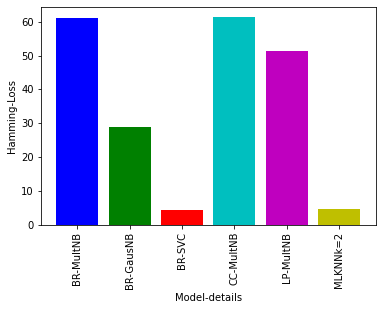

In [ ]:
x = ['BR-MultNB','BR-GausNB','BR-SVC','CC-MultNB','LP-MultNB','MLKNNk=2']
y = [61.26,28.755,4.38,61.282,51.47,4.689]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y'])
plt.ylabel('Hamming-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

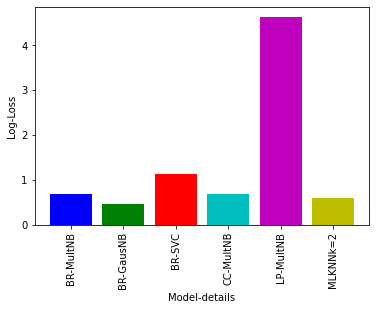

In [ ]:
x = ['BR-MultNB','BR-GausNB','BR-SVC','CC-MultNB','LP-MultNB','MLKNNk=2']
y = [0.68,0.47,1.12,0.678,4.625,0.583]                      
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y'])
plt.ylabel('Log-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

- While showing among the best problem transformation method models, hamming-loss was considered (this is because for BP-MLL neural network we had to round the final results to get the hamming-loss because of the output being multivalued probabilities)
- But while chosing among the best Adaptation Algorithm model, log loss was preferred.

# Comparing models and Concluding!

The final step was to figure out which model gave the best results. 
A mixture of hamming-loss and log-loss was used to select the same. 
Comparison of the two best models with benchmark model is as below:


From visualizations above, The lesser the loss, the better the model!


# Comparison of the best models is as below:

# If we compare all the models on basis of hamming-loss : 

The best model would be **SVM classifier model**. 
It has a hamming-loss of 4.384 % only.

# If we compare all the models on basis of Log-loss :

The best model will be the **Neural Network Model**.
It has a Log-loss of 0.375 % only.

# Conclusion

1-Wether the 'comment' is malignant,highly_malignant,rude,....etc is can be predicted using the model above. 
2-By using sklearn(SVM) & DL-NN I have build a model that will predict wether the 'comment' is malignant,highly_malignant,rude,....etc

## I reccomend DL-NN model for this project. 

# The End.